In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc

### 1. Preparing Dataset

In [117]:
dataIris = load_iris()
dir(dataIris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [118]:
df = pd.DataFrame(
    dataIris['data'],
    columns= ['SL', 'SW', 'PL', 'PW']
)
df['target'] = dataIris['target']
df['spesies'] = df['target'].apply(
    lambda x: dataIris['target_names'][x]
)
df.head()

,SL,SW,PL,PW,target,spesies
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


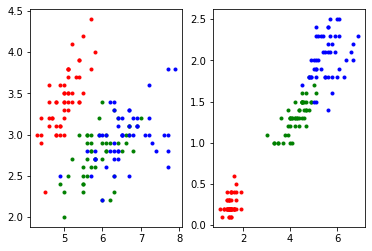

In [141]:
plt.figure()
plt.subplot(121)
plt.plot(df['SL'][df['target'] == 0], df['SW'][df['target'] == 0], 'r.')
plt.plot(df['SL'][df['target'] == 1], df['SW'][df['target'] == 1], 'g.')
plt.plot(df['SL'][df['target'] == 2], df['SW'][df['target'] == 2], 'b.')
plt.subplot(122)
plt.plot(df['PL'][df['target'] == 0], df['PW'][df['target'] == 0], 'r.')
plt.plot(df['PL'][df['target'] == 1], df['PW'][df['target'] == 1], 'g.')
plt.plot(df['PL'][df['target'] == 2], df['PW'][df['target'] == 2], 'b.')

### 2. Splitting Dataset

In [119]:
xtr, xts, ytr, yts = train_test_split(
    df[['SL', 'SW', 'PL', 'PW']], df['target']
)

In [120]:
# xtr

### 3. Logistic Regression

In [121]:
modelA = LogisticRegression(solver='lbfgs', multi_class='auto')
modelB = LogisticRegression(solver='liblinear', multi_class='auto')

In [122]:
modelA.fit(xtr, ytr)
modelB.fit(xtr, ytr)

C:\Users\Adyan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:
a = modelA.predict_proba(xts)
b = modelB.predict_proba(xts)

### 4. ROC AUC

In [124]:
fpra0, tpra0, thrsa0 = roc_curve(yts, a[:, 0], pos_label=0)
fprb0, tprb0, thrsb0 = roc_curve(yts, b[:, 0], pos_label=0)

In [125]:
fpra1, tpra1, thrsa1 = roc_curve(yts, a[:, 1], pos_label=1)
fprb1, tprb1, thrsb1 = roc_curve(yts, b[:, 1], pos_label=1)

In [126]:
fpra2, tpra2, thrsa2 = roc_curve(yts, a[:, 2], pos_label=2)
fprb2, tprb2, thrsb2 = roc_curve(yts, b[:, 2], pos_label=2)

#### a. AUC Score

In [127]:
aucA0 = auc(fpra0, tpra0)
aucB0 = auc(fprb0, tprb0)
aucA1 = auc(fpra1, tpra1)
aucB1 = auc(fprb1, tprb1)
aucA2 = auc(fpra2, tpra2)
aucB2 = auc(fprb2, tprb2)

aucA0, aucB0, aucA1, aucB1, aucA2, aucB2

(1.0,
 1.0,
 0.9910714285714285,
 0.9553571428571428,
 0.98989898989899,
 0.9494949494949494)

#### b. ROC AUC Score

In [137]:
rasA = roc_auc_score(yts, a, labels=[0,1,2], multi_class='ovo')
rasB = roc_auc_score(yts, b, labels=[0,1,2], multi_class='ovo')

rasA, rasB

(0.9935064935064934, 0.9675324675324676)

Text(0, 0.5, 'True Positive Rate')

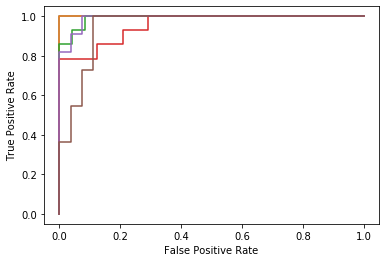

In [138]:
plt.plot(fpra0, tpra0)
plt.plot(fprb0, tprb0)
plt.plot(fpra1, tpra1)
plt.plot(fprb1, tprb1)
plt.plot(fpra2, tpra2)
plt.plot(fprb2, tprb2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')